# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [ ]:
# TODO: Load the three CSV files into dataframes
# provider_df = pd.read_csv(...)
# facility_df = pd.read_csv(...)
# encounter_df = pd.read_csv(...)
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')


# TODO: Print the shapes of each dataframe
# print("Provider data shape:", ...)
# print("Facility data shape:", ...)
# print("Encounter data shape:", ...)
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)


# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed

# 1. Merge encounter_df with provider_df on 'provider_id'
merged_df = encounter_df.merge(provider_df, on = 'provider_id', how = 'left', suffixes = ('', '_provider'))

# 2. Merge result with facility_df on 'facility_id'
merged_df = merged_df.merge(facility_df, on = 'facility_id', how = 'left', suffixes = ('', '_facility'))

# 3. Handling duplicate columns
# Drop duplicate region column from facility
if 'region_facility' in merged_df.columns:
    merged_df = merged_df.drop(columns = ['region_facility'])


# TODO: Print the merged dataframe shape, columns, and first few rows
# print("\nMerged data shape:", ...)
# print("\nColumns:", ...)
# print("\nFirst few rows:")
# print(...)
print("Merged data shape:", merged_df.shape)
print("\nMerged data columns:", merged_df.columns.tolist())
print("\nFirst few rows:", merged_df.head())
print(...)

Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)
Merged data shape: (5000, 22)

Merged data columns: ['encounter_id', 'patient_id', 'provider_id', 'facility_id', 'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid', 'region', 'provider_name', 'provider_type', 'facility_id_provider', 'specialty', 'years_experience', 'license_number', 'facility_name', 'facility_type', 'beds', 'established_date']

First few rows:   encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_code  procedure_code  service_

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [14]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility
facility_years_experience = merged_df.groupby('facility_name')['years_experience'].agg([
    ('mean', 'mean'),
    ('sum', 'sum'),
    ('count', 'count')
]).round(2)

print("Years of Experience Stats by Facility:")
print(facility_years_experience)
print()

# TODO: Calculate total encounter charges by facility
facility_charges = merged_df.groupby('facility_name')['service_charge'].sum().round(2)
print("Total encounter charges by facility:")
print(facility_charges.sort_values(ascending = False))
print()

# TODO: Calculate total insurance payments by facility
facility_insurance = merged_df.groupby('facility_name')['insurance_paid'].sum().round(2)
print("Total insurance payments by facility")
print(facility_insurance.sort_values(ascending = False))
print()

# TODO: Find the facility with highest total encounter charges
highest_charge_facility = facility_charges.idxmax()
highest_charge_amount = facility_charges.max()
print(f"Facility with highest total charges: {highest_charge_facility}")
print(f"Amount: ${highest_charge_amount:,.2f}")
print()


# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
facility_summary = merged_df.groupby('facility_name').agg({
    'provider_id': 'nunique',           
    'years_experience': 'mean',         
    'service_charge': 'sum',            
    'insurance_paid': 'sum'            
}).round(2)

print("Facility Summary:")
print(facility_summary)

# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
facility_summary.to_csv('output/q1_groupby_analysis.csv', index = False)
print("\n Saved summary to 'output/q1_groupby_analysis.csv'")


Years of Experience Stats by Facility:
                              mean    sum  count
facility_name                                   
Cardiology Specialty Center  19.32   8520    441
City General Hospital        19.56   9625    492
Community Health Clinic      20.16  10282    510
Emergency Medical Center     19.67   9736    495
Northside Urgent Care        20.14   9847    489
Oncology Treatment Center    19.38   9865    509
Pediatric Care Center        19.81  10520    531
Primary Care Clinic          20.10  10152    505
Regional Medical Center      20.21   9660    478
Surgical Specialty Center    20.78  11428    550

Total encounter charges by facility:
facility_name
Pediatric Care Center          361811.04
Surgical Specialty Center      349909.18
Community Health Clinic        334992.21
Oncology Treatment Center      334927.30
Primary Care Clinic            323315.71
Regional Medical Center        316284.98
Emergency Medical Center       310735.25
Northside Urgent Care          297

### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [31]:
# TODO: Add facility mean years_experience as new column
merged_df['facility_mean_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('mean')

# TODO: Add facility standard deviation of years_experience
merged_df['facility_std_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('std')

# TODO: Create normalized years_experience (z-score within facility)
# remember z-score = (value - mean) / sd
merged_df['experience_zscore'] = (
    (merged_df['years_experience'] - merged_df['facility_mean_experience']) / 
    merged_df['facility_std_experience']
).round(2)

# TODO: Add facility total encounter charges as new column
merged_df['facility_charges'] = merged_df.groupby('facility_name')['service_charge'].transform('sum')

# TODO: Display the enhanced dataframe
print("Enhanced dataframe with group statistics:")
print("=" * 60)
print(merged_df[['facility_name', 'provider_name', 'years_experience',
                 'facility_mean_experience', 'facility_std_experience',
                 'experience_zscore', 'service_charge', 'facility_charges']].head(10))

# TODO: Save results as 'output/q1_aggregation_report.txt'
with open('output/q1_aggregation_report.txt', 'w') as f:
    f.write("Facility Aggregation Report\n")
    f.write("=" * 60 + "\n\n")
    
    f.write("Enhanced Dataframe (first 20 rows)\n")
    f.write("-" * 60 + "\n")
    f.write(merged_df[['facility_name', 'provider_name', 'years_experience',
                 'facility_mean_experience', 'facility_std_experience',
                 'experience_zscore', 'service_charge', 'facility_charges']].head(20).to_string())
    
    f.write("\n\n" + "="*60 + "\n")
    f.write("Facility-Level statistics\n")
    f.write("=" * 60 + "\n\n")
    
    facility_stats = merged_df.groupby('facility_name').agg({
        'facility_mean_experience': 'first',
        'facility_std_experience': 'first', 
        'facility_charges': 'first', 
        'encounter_id': 'count'
        }).round(2)
    
    facility_stats.columns = ['Avg Experience', 'Std Experience', 'Total Charges', 'Encounter Count']
    facility_stats = facility_stats.sort_values('Total Charges', ascending=False)
    
    f.write(facility_stats.to_string())
    
    print("\n Saved aggregation report to 'output/q1_aggregation_reoprt.txt'")

Enhanced dataframe with group statistics:
               facility_name     provider_name  years_experience  \
0      Northside Urgent Care    Quinn Anderson                11   
1      City General Hospital     Drew Martinez                19   
2      City General Hospital   Jordan Anderson                 3   
3      Northside Urgent Care  Taylor Rodriguez                 6   
4    Regional Medical Center     Drew Anderson                36   
5      Northside Urgent Care     Cameron Smith                14   
6      Northside Urgent Care       Alex Garcia                11   
7      City General Hospital      Riley Miller                23   
8      Northside Urgent Care      Morgan Davis                 6   
9  Surgical Specialty Center   Jordan Williams                 2   

   facility_mean_experience  facility_std_experience  experience_zscore  \
0                 20.137014                10.581439              -0.86   
1                 19.563008                10.702137       

## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [21]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
sufficient_staff = facility_summary[facility_summary['provider_id'] > 20]
print("Facilities with more than 20 providers:")
print(sufficient_staff)
print(f"\nFound {len(sufficient_staff)} well-staffed facilities\n")

# TODO: Filter facilities with average years_experience > 10 (experienced staff)
experienced_staff = facility_summary[facility_summary['years_experience'] > 10]
print("Facilities with >10 average years experience:")
print(experienced_staff)
print(f"\nFound {len(experienced_staff)} facilities with experienced staff\n")

# TODO: Filter facilities with total encounter charges > 250000 (high volume)
high_volume = facility_summary[facility_summary['service_charge'] > 250000]
print("Facilities with total encounter charges > $250,000:")
print(high_volume)
print(f"\nFound {len(high_volume)} high-volume facilities\n")

# TODO: Create a summary of filtered results
filtered_summary = facility_summary[
    (facility_summary['provider_id']>20) &
    (facility_summary['years_experience']>10) &
    (facility_summary['service_charge']>250000) 
    ]    

print("=" * 60)
print("Facilities meeting all criteria:")
print("(>20 providers and >10 average years experience and >$250,000 charges)")
print("=" * 60)

print(filtered_summary)
print(f"\n{len(filtered_summary)} facilities meet all criteria.")

# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_summary.to_csv('output/q2_filter_analysis.csv', index = False)
print("\nSaved filtered results to 'output/q2_filter_analysis.csv'")

Facilities with more than 20 providers:
                             provider_id  years_experience  service_charge  \
facility_name                                                                
Cardiology Specialty Center          297             19.32       276658.83   
City General Hospital                312             19.56       295508.13   
Community Health Clinic              328             20.16       334992.21   
Emergency Medical Center             299             19.67       310735.25   
Northside Urgent Care                305             20.14       297283.06   
Oncology Treatment Center            324             19.38       334927.30   
Pediatric Care Center                326             19.81       361811.04   
Primary Care Clinic                  316             20.10       323315.71   
Regional Medical Center              309             20.21       316284.98   
Surgical Specialty Center            340             20.78       349909.18   

                       

### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [38]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    return pd.Series({
        'mean_experience': group['years_experience'].mean(),
        'std_experience': group['years_experience'].std(),
        'min_experience': group['years_experience'].min(),
        'max_experience': group['years_experience'].max(),
        'provider_count': group['provider_id'].nunique(),
        'encounter_count': len(group)
    })

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

print("Provider statistics by facility:")
print("-" * 60)
print(facility_provider_stats.round(2))
print()

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    provider_encounters = group.groupby('provider_id').size().reset_index(name = 'encounter_count')
    
    top_n = provider_encounters.nlargest(n, 'encounter_count')
    
    result = top_n.merge(
        group[['provider_id', 'provider_name', 'years_experience', 'specialty']].drop_duplicates('provider_id'),
        on = 'provider_id'
    )
    return result[['provider_id', 'provider_name', 'years_experience', 'specialty', 'encounter_count']]


# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

print("Top 2 providers by facility (by encounter volume):")
print("-" * 60)
print(top_providers_by_facility)
print()

# TODO: Save results as 'output/q2_performance_report.txt'
with open('output/q2_performance_report.txt', 'w') as f:
    f.write("Provider performance report\n")
    f.write("=" * 60 + "\n\n")
    
    f.write ("Provider facility statistics\n")
    f.write("-"*60 + "\n")
    f.write(facility_provider_stats.round(2).to_string())
    
    f.write("\n\n" + "="*60 + "\n")
    f.write("Top 2 providers per facility (by encounter volume)\n")
    f.write("-"*60 + "\n")
    f.write(top_providers_by_facility.to_string(index = False))
    
print("Saved performance report to 'output/q2_performance_report.txt")

Provider statistics by facility:
------------------------------------------------------------
                             mean_experience  std_experience  min_experience  \
facility_name                                                                  
Cardiology Specialty Center            19.32           10.48             1.0   
City General Hospital                  19.56           10.70             1.0   
Community Health Clinic                20.16           11.04             1.0   
Emergency Medical Center               19.67           11.02             1.0   
Northside Urgent Care                  20.14           10.58             1.0   
Oncology Treatment Center              19.38           10.87             1.0   
Pediatric Care Center                  19.81           11.00             1.0   
Primary Care Clinic                    20.10           11.08             1.0   
Regional Medical Center                20.21           11.58             1.0   
Surgical Specialty Center 

/var/folders/lk/cfqjvsz57sbbg9szxbdn30jc0000gn/T/ipykernel_39041/1268981130.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [ ]:
# TODO: Group by facility type and region
# TODO: Calculate statistics for each facility_type-region combination
multilevel_stats = merged_df.groupby(['facility_type', 'region']).agg({
    'encounter_id': 'count',
    'service_charge': ['sum', 'mean'],
    'insurance_paid': 'sum',
    'patient_paid': 'sum',
    'provider_id': 'nunique',
    'years_experience': 'mean'
}).round(2)

multilevel_stats.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in multilevel_stats.columns.values]

multilevel_stats = multilevel_stats.rename(columns={
    'encounter_id_count': 'total_encounters',
    'service_charge_sum': 'total_charges',
    'service_charge_mean': 'avg_charge',
    'insurance_paid_sum': 'total_insurance',
    'patient_paid_sum': 'total_patient_paid',
    'provider_id_nunique': 'unique_providers',
    'years_experience_mean': 'avg_experience'
})

print("Columns after flattening:")
print(multilevel_stats.columns.tolist())
print()

print(multilevel_stats.sort_values('total_charges', ascending=False).head(10))

# TODO: Use unstack to convert to wide format
multilevel_wide = multilevel_stats['total_encounters'].unstack(fill_value = 0)

print("Wide format (unstacked): encounters by facility type and region")
print("="*60)
print(multilevel_wide)
print()

# TODO: Use stack to convert back to long format
multilevel_long = multilevel_wide.stack()

print("Long format (stacked back): encounters by facility type and region")
print("="*60)
print(multilevel_long)
print()

# TODO: Analyze the hierarchical structure
facility_type_summary = merged_df.groupby('facility_type').agg({
    'encounter_id': 'count',
    'service_charge': 'sum',
    'facility_id': 'nunique',
    'provider_id': 'nunique'
}).round(2)

facility_type_summary.columns = ['total_encounters', 'total_revenue', 'num_facilities', 'num_providers']

print("Level 1: Facility Type Summary")
print("=" * 70)
print(facility_type_summary.sort_values('total_revenue', ascending=False))
print()

# Level 1: Region summary
region_summary = merged_df.groupby('region').agg({
    'encounter_id': 'count',
    'service_charge': 'sum',
    'facility_id': 'nunique',
    'provider_id': 'nunique'
}).round(2)

region_summary.columns = ['total_encounters', 'total_revenue', 'num_facilities', 'num_providers']

print("Level 1: Region Summary")
print("=" * 70)
print(region_summary.sort_values('total_revenue', ascending=False))
print()

# Level 2: Detailed breakdown (facility_type x region)
print("Level 2: Detailed Breakdown (Facility Type x Region)")
print("=" * 70)
print(multilevel_stats.sort_values('total_charges', ascending=False).head(10))
print()

# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
multilevel_stats.to_csv('output/q2_hierarchical_analysis.csv')

Columns after flattening:
['total_encounters', 'total_charges', 'avg_charge', 'total_insurance', 'total_patient_paid', 'unique_providers', 'avg_experience']

                         total_encounters  total_charges  avg_charge  \
facility_type    region                                                
Specialty Center South               1026      672546.29      655.50   
Urgent Care      West                1039      647192.24      622.90   
                 South                970      611793.11      630.71   
Specialty Center West                 946      599974.54      634.22   
Urgent Care      North                510      334992.21      656.85   
Hospital         South                509      334927.30      658.01   

                         total_insurance  total_patient_paid  \
facility_type    region                                        
Specialty Center South         540230.15           132316.14   
Urgent Care      West          515343.09           131849.15   
         

## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [62]:
# TODO: Create pivot table: encounter charges by procedure code and region
pivot_charges = pd.pivot_table(
    merged_df,
    values = 'service_charge',
    index = 'procedure_code',
    columns = 'region',
    aggfunc = 'sum',
    fill_value = 0,
    margins = True
).round(2)

print("Pivot Table: Total charges by procedure code and region")
print("-"*60)
print(pivot_charges)
print()

# TODO: Create pivot table with multiple aggregations (sum, mean, count)
pivot_multi_agg = pd.pivot_table(
    merged_df,
    values = 'service_charge',
    index = 'diagnosis_code',
    columns = 'encounter_type',
    aggfunc = ['sum', 'mean', 'count'],
    fill_value = 0
).round(2)

print("Pivot Table: Multiple aggregations by diagnosis and encounter type")
print("-"*60)
print(pivot_multi_agg.head(10))
print()

# TODO: Add totals (margins) to pivot table
# pivot table with provider specialty and region
pivot_specialty = pd.pivot_table(
    merged_df,
    values = ['service_charge', 'insurance_paid', 'patient_paid'],
    index = 'specialty',
    columns = 'region',
    aggfunc = 'sum',
    fill_value = 0,
    margins = True,
    margins_name = 'Total'
).round(2)

print("Pivot table with totals: Revenue by specialty and region")
print("-"*60)
print(pivot_specialty)
print()

# TODO: Handle missing values with fill_value
# pivot table with encounter counts by facility type and encounter type
pivot_encounter_count = pd.pivot_table(
    merged_df,
    values = 'encounter_id',
    index = 'facility_type',
    columns = 'encounter_type',
    aggfunc = 'count',
    fill_value = 0
).round(2)

print("Pivot table: Encounter counts by facility type and encounter type")
print("=" * 60)
print(pivot_encounter_count)
print()

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
# Will save pivot table with multiple aggregations by diagnosis and encounter type to CSV, since a summary table was not made in this question
pivot_multi_agg.to_csv('output/q3_pivot_analysis.csv')

print("Saved pivot analysis to: output/q3_pivot_analysis.csv")


Pivot Table: Total charges by procedure code and region
------------------------------------------------------------
region              North       South        West         All
procedure_code                                               
36415            12130.35    57836.97    48458.05   118425.37
70450            90236.85   375893.20   312204.53   778334.58
70551            52844.83   234817.26   160891.32   448553.41
72040            11463.33    81039.58    56599.39   149102.30
80053            14798.09    83849.78    58540.39   157188.26
85025             8946.57    48989.64    40769.13    98705.34
93000             6743.28    55873.35    45845.38   108462.01
99213            62143.42   327262.66   259242.79   648648.87
99214            71684.08   322532.05   240095.41   634311.54
99283             4001.41    31172.21    24520.39    59694.01
All             334992.21  1619266.70  1247166.78  3201425.69

Pivot Table: Multiple aggregations by diagnosis and encounter type
---------

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [68]:
# TODO: Create crosstab of facility type vs region with counts
crosstab_facility_region = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region']
)

print("Basic crosstab: facility type vs. region (encounter counts)")
print("-"*60)
print(crosstab_facility_region)
print()

# TODO: Create crosstab with margins (row and column totals)
crosstab_with_margins = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region'],
    margins = True,
    margins_name = 'Total'
)

print("Crosstab with margins: facility type vs region")
print("-" * 60)
print(crosstab_with_margins)
print()

# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab_multi = pd.crosstab(
    index = [merged_df['facility_type'], merged_df['encounter_type']],
    columns = merged_df['region'],
    margins = True,
    margins_name = 'Total'
)

print("Multi-dimensional crosstab: facility type x encounter type vs. region")
print("-" * 60)
print(crosstab_multi)
print()

# TODO: Analyze the cross-tabulation results
print("="*60)
print("Crosstab analysis")
print("="*60)

# Most common facility type
most_common_facility = crosstab_with_margins.loc[:, 'Total'].drop('Total').idxmax()
most_common_count = crosstab_with_margins.loc[most_common_facility, 'Total']

print(f"\nMost Common Facility Type: {most_common_facility}")
print(f"  - Total Encounters: {most_common_count}")

# Most common region
most_common_region = crosstab_with_margins.loc['Total', :].drop('Total').idxmax()
most_common_region_count = crosstab_with_margins.loc['Total', most_common_region]

print(f"\nMost Active Region: {most_common_region}")
print(f"  - Total Encounters: {most_common_region_count}")

# To calculate distribution statistics
total_encounters = crosstab_with_margins.loc['Total', 'Total']
print(f"\nTotal Encounters Analyzed: {total_encounters}")
print(f"Number of Facility Types: {len(crosstab_facility_region)}")
print(f"Number of Regions: {len(crosstab_facility_region.columns)}")



# TODO: Save results as 'output/q3_crosstab_analysis.csv'
# saving basic crosstab with margins facility type vs. region 
crosstab_with_margins.to_csv('output/q3_crosstab_basic.csv')
print("\nSaved basic crosstab analysis (with margins) to: output/q3_crosstab_basic.csv")

Basic crosstab: facility type vs. region (encounter counts)
------------------------------------------------------------
region            North  South  West
facility_type                       
Hospital              0    509     0
Specialty Center      0   1026   946
Urgent Care         510    970  1039

Crosstab with margins: facility type vs region
------------------------------------------------------------
region            North  South  West  Total
facility_type                              
Hospital              0    509     0    509
Specialty Center      0   1026   946   1972
Urgent Care         510    970  1039   2519
Total               510   2505  1985   5000

Multi-dimensional crosstab: facility type x encounter type vs. region
------------------------------------------------------------
region                                 North  South  West  Total
facility_type    encounter_type                                 
Hospital         Emergency                 0    127     0  

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

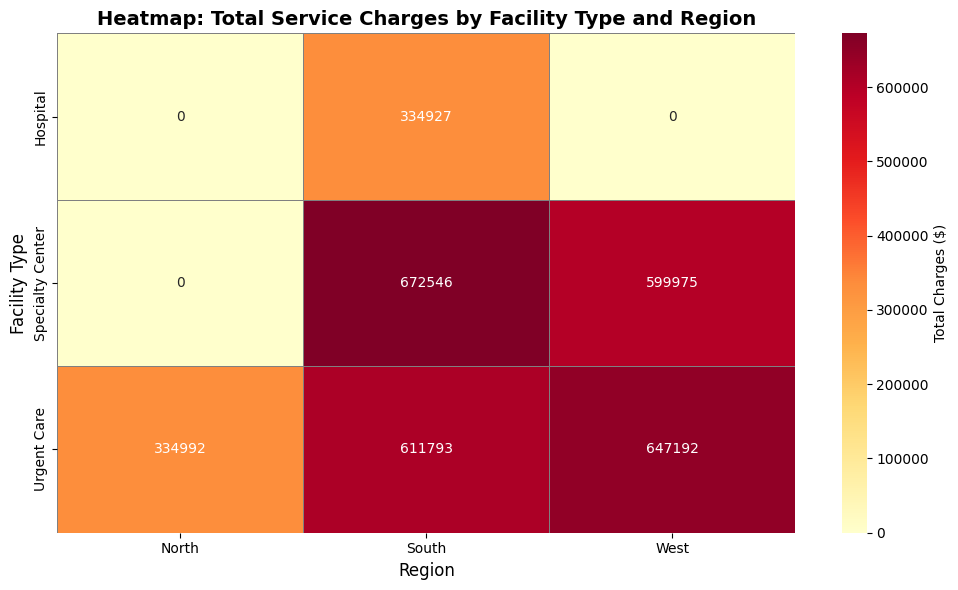

Saved heatmap to 'output/q3_heatmap_charges.png'


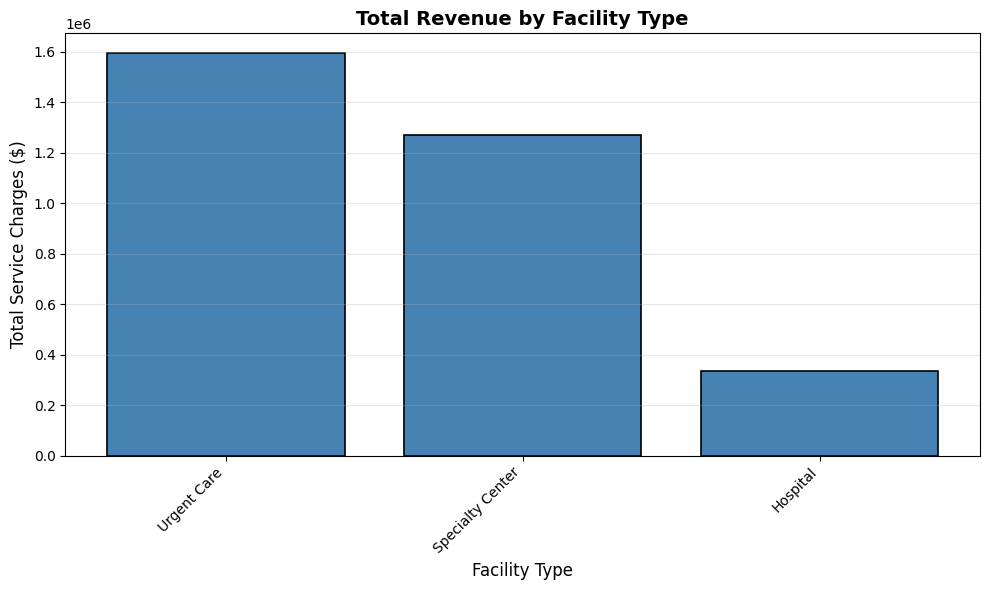

Saved bar chart to 'output/q3_bar_facility_revenue.png'


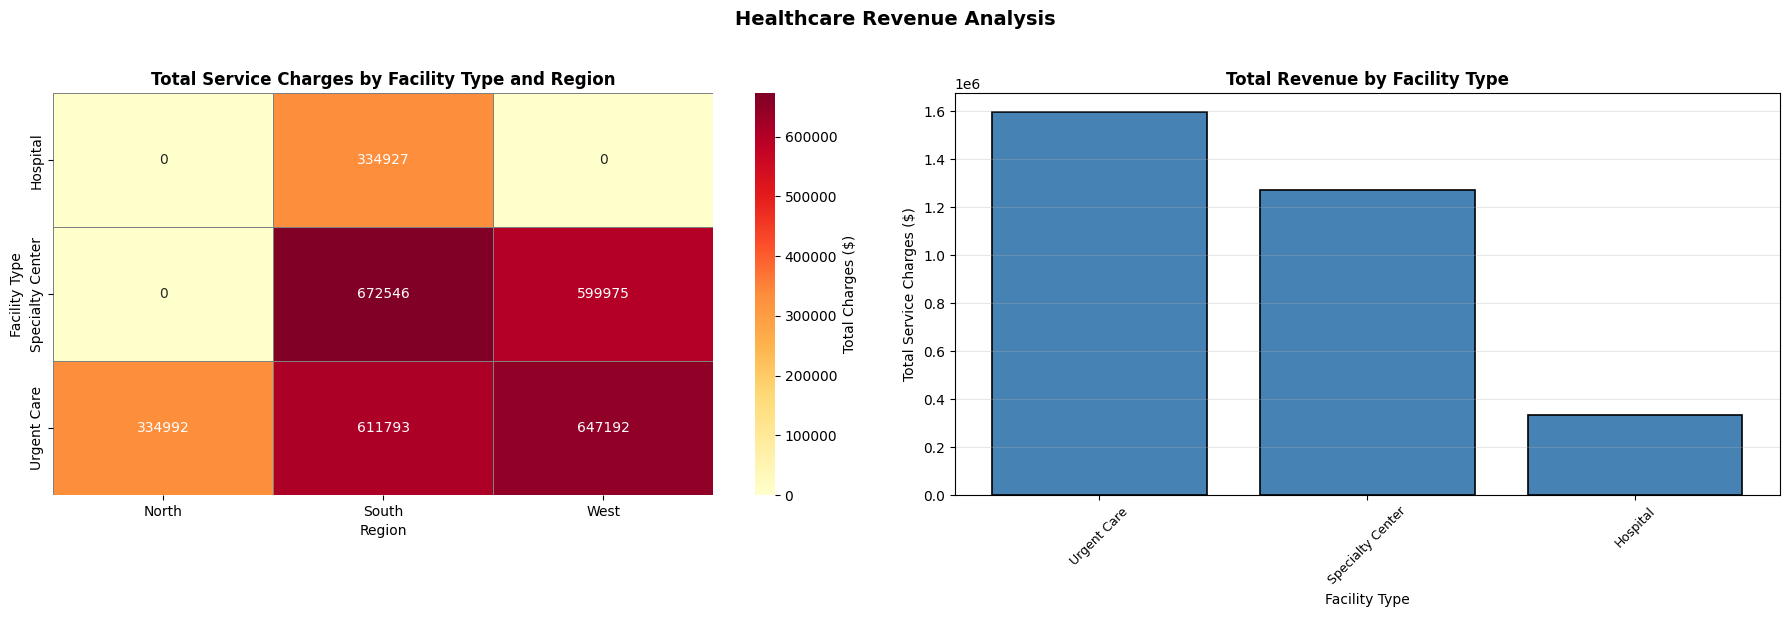

Saved combined plots as 'output/q3_pivot_visualization.png'


In [75]:
# TODO: Create heatmap from pivot table
# Charges by facility type and region
heatmap_pivot = pd.pivot_table(
    merged_df,
    values = 'service_charge',
    index = 'facility_type',
    columns = 'region',
    aggfunc = 'sum',
    fill_value = 0
).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_pivot,
    annot=True,  
    fmt='.0f',   
    cmap='YlOrRd',  
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Total Charges ($)'}
)
plt.title('Heatmap: Total Service Charges by Facility Type and Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Facility Type', fontsize=12)
plt.tight_layout()
plt.savefig('output/q3_heatmap_charges.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved heatmap to 'output/q3_heatmap_charges.png'")

# TODO: Create bar chart from pivot table
# Total revenue by facility type
facility_revenue = merged_df.groupby('facility_type')['service_charge'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(facility_revenue.index, facility_revenue.values, color='steelblue', edgecolor='black', linewidth=1.2)

plt.title('Total Revenue by Facility Type', fontsize=14, fontweight='bold')
plt.xlabel('Facility Type', fontsize=12)
plt.ylabel('Total Service Charges ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('output/q3_bar_facility_revenue.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved bar chart to 'output/q3_bar_facility_revenue.png'")

# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels

# TODO: Save the plot as 'output/q3_pivot_visualization.png'
fig, axes = plt.subplots(1, 2, figsize = (18,6))

# Left subplot = heatmap
sns.heatmap(
    heatmap_pivot,
    annot = True,
    fmt = '.0f',
    cmap = 'YlOrRd',
    linewidths = 0.5,
    linecolor = 'gray',
    cbar_kws = {'label': 'Total Charges ($)'},
    ax = axes[0]
)
axes[0].set_title('Total Service Charges by Facility Type and Region', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Region', fontsize=10)
axes[0].set_ylabel('Facility Type', fontsize=10)

# Right subplot = bar chart
bars = axes[1].bar(
    facility_revenue.index,
    facility_revenue.values,
    color = 'steelblue',
    edgecolor = 'black',
    linewidth = 1.2
)
axes[1].set_title('Total Revenue by Facility Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Facility Type', fontsize=10)
axes[1].set_ylabel('Total Service Charges ($)', fontsize=10)
axes[1].tick_params(axis='x', rotation=45, labelsize=9)
axes[1].grid(axis='y', alpha=0.3)

fig.suptitle('Healthcare Revenue Analysis', fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('output/q3_pivot_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved combined plots as 'output/q3_pivot_visualization.png'")

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques